In [1]:
import json
import geopandas as gpd
import osmnx
import shapely.wkt
from shapely.geometry import LineString
import pandas as pd

# Load preprocessed house nodes
with open('./houseNodes.json', encoding='utf-8') as f:
    houseRawNodes=json.load(f)

for house in houseRawNodes:
    if type(house['geometry']) == str:
        house['geometry'] = shapely.wkt.loads(house['geometry'])
    if type(house['toGeometry']) == str:
        house['toGeometry'] = shapely.wkt.loads(house['toGeometry'])
        
nodes = gpd.read_file('data/sample/nodes/nodes.shp')
edges = gpd.read_file('data/sample/edges/edges.shp')

In [2]:
new_edges = []

for house in houseRawNodes:
    if house['geometry'].y > 55.15:
        continue
    
    new_edges.append({

        "from": house['closest'], 
        "to": house['osmid'], 
        "geometry": LineString([(house['geometry'].x, house['geometry'].y), (house['toGeometry'].x, house['toGeometry'].y)]),
        
        "key": 0,
        "107413303": 0,
        "name": None,
        "highway": "residential",
        "oneway": False, 
        "length": 0, 
        "highway": "projected_footway",
        "ref": None,
        "maxspeed": None,
        "lanes": None,
        "bridge": None,
        "junction": None,
        "service": None,
        "tunnel": None,
        "access": None,
        "width": None,
    })

In [3]:
edges

,key,osmid,name,highway,oneway,length,from,to,maxspeed,lanes,ref,bridge,junction,service,tunnel,access,width,geometry
0,0,107413303,Севастопольская улица,residential,False,84.417,1234550689,1234550787,None,None,None,None,None,None,None,None,None,"LINESTRING (73.32901 54.93515, 73.32918 54.93590)"
1,0,48538662,None,secondary_link,True,87.916,288473100,941363326,None,None,None,None,None,None,None,None,None,"LINESTRING (73.40803 55.02117, 73.40771 55.021..."
2,0,80715667,1-я улица Челюскинцев,tertiary,False,160.164,484756691,288473100,None,None,None,None,None,None,None,None,None,"LINESTRING (73.40790 55.01974, 73.40808 55.020..."
3,0,80715735,улица Багратиона,secondary,False,419.12100000000004,617108045,288473100,60,None,None,None,None,None,None,None,None,"LINESTRING (73.41393 55.02283, 73.41386 55.022..."
4,0,310790638,None,secondary_link,True,75.613,941363294,288473100,None,None,None,None,None,None,None,None,None,"LINESTRING (73.40703 55.02081, 73.40723 55.020..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10850,0,240342011,None,secondary_link,False,15.705,2480881628,2480881626,None,None,None,None,None,None,None,None,None,"LINESTRING (73.29102 55.03884, 73.29125 55.03879)"
10851,0,332856648,улица Химиков,secondary,True,72.378,2480881626,2480881635,40,2,None,None,None,None,None,None,None,"LINESTRING (73.29125 55.03879, 73.29164 55.03940)"
10852,0,332856648,улица Химиков,secondary,True,67.815,2480881635,2480881637,40,2,None,None,None,None,None,None,None,"LINESTRING (73.29164 55.03940, 73.29201 55.03998)"
10853,0,240342012,None,secondary_link,False,16.332,2480881638,2480881637,None,None,None,None,None,None,None,None,None,"LINESTRING (73.29177 55.04003, 73.29201 55.03998)"


In [4]:
newEdgesDf = gpd.GeoDataFrame(new_edges)

allEdges = pd.concat([edges, newEdgesDf])

allEdges['maxspeed'] = 40

allEdges

,key,osmid,name,highway,oneway,length,from,to,maxspeed,lanes,ref,bridge,junction,service,tunnel,access,width,geometry,107413303
0,0,107413303,Севастопольская улица,residential,False,84.417,1234550689,1234550787,40,None,None,None,None,None,None,None,None,"LINESTRING (73.32901 54.93515, 73.32918 54.93590)",NaN
1,0,48538662,None,secondary_link,True,87.916,288473100,941363326,40,None,None,None,None,None,None,None,None,"LINESTRING (73.40803 55.02117, 73.40771 55.021...",NaN
2,0,80715667,1-я улица Челюскинцев,tertiary,False,160.164,484756691,288473100,40,None,None,None,None,None,None,None,None,"LINESTRING (73.40790 55.01974, 73.40808 55.020...",NaN
3,0,80715735,улица Багратиона,secondary,False,419.12100000000004,617108045,288473100,40,None,None,None,None,None,None,None,None,"LINESTRING (73.41393 55.02283, 73.41386 55.022...",NaN
4,0,310790638,None,secondary_link,True,75.613,941363294,288473100,40,None,None,None,None,None,None,None,None,"LINESTRING (73.40703 55.02081, 73.40723 55.020...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,0,NaN,None,projected_footway,False,0,1430650622,9572269,40,None,None,None,None,None,None,None,None,"LINESTRING (73.40368 54.97463, 73.40400 54.97521)",0.0
6391,0,NaN,None,projected_footway,False,0,312981608,9831618,40,None,None,None,None,None,None,None,None,"LINESTRING (73.24049 54.99551, 73.24189 54.99502)",0.0
6392,0,NaN,None,projected_footway,False,0,440262577,10721339,40,None,None,None,None,None,None,None,None,"LINESTRING (73.45630 54.91073, 73.45704 54.90990)",0.0
6393,0,NaN,None,projected_footway,False,0,312981610,10742403,40,None,None,None,None,None,None,None,None,"LINESTRING (73.23266 54.99598, 73.23184 54.99562)",0.0


In [5]:
new_nodes = []

for house in houseRawNodes:
    if house['geometry'].y > 55.15:
        continue
    
    new_nodes.append({
        "osmid": house['osmid'],
        "geometry": house['geometry'],
        "tag": house['tag'],
        "highway": None,
    })
    
newNodesDf = gpd.GeoDataFrame(new_nodes)

allNodes = pd.concat([nodes, newNodesDf])

allNodes

,osmid,highway,geometry,tag
0,1234550787,None,POINT (73.32918 54.93590),NaN
1,288473100,None,POINT (73.40803 55.02117),NaN
2,288473104,traffic_signals,POINT (73.41748 55.02386),NaN
3,2953936913,None,POINT (73.39725 54.94583),NaN
4,3793731605,None,POINT (73.26084 54.97555),NaN
...,...,...,...,...
6390,9572269,None,POINT (73.40368 54.97463),apartments
6391,9831618,None,POINT (73.24049 54.99551),apartments
6392,10721339,None,POINT (73.45630 54.91073),apartments
6393,10742403,None,POINT (73.23266 54.99598),apartments


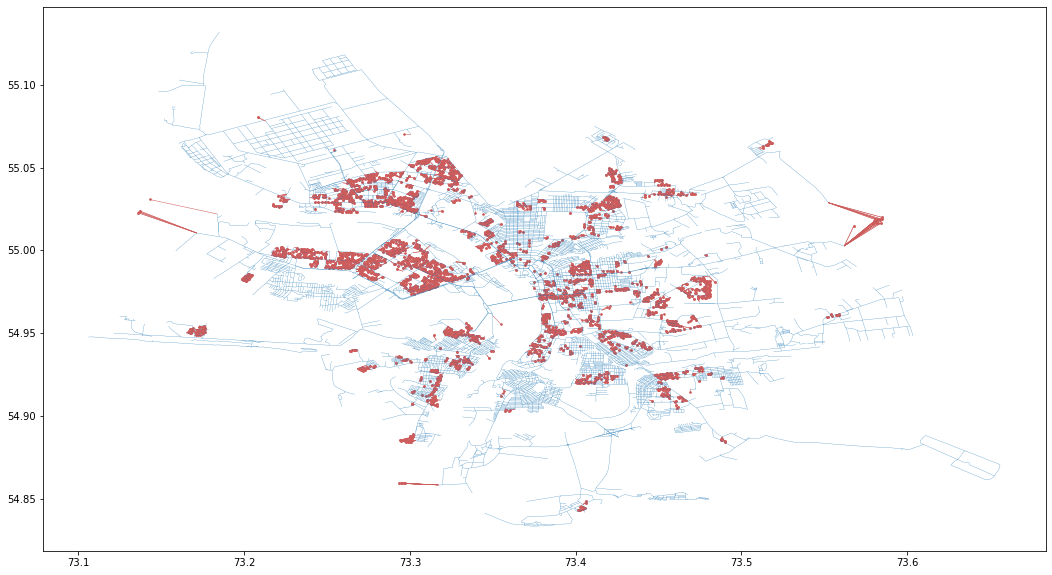

In [6]:
poi_links = newEdgesDf[newEdgesDf['highway'] == 'projected_footway']

ax = edges.plot(linewidth=0.25, figsize=(18,10), label='Original Road Edges')
newEdgesDf.plot(color='indianred', linewidth=0.5, ax=ax, label='New Connection Edges')

newNodesDf.plot(color='indianred', marker='.', markersize=10, ax=ax, label='POI')

In [13]:
allNodes.gdf_name = "All_nodes"

allNodes['x'] = allNodes['geometry'].apply(lambda p: p.x)
allNodes['y'] = allNodes['geometry'].apply(lambda p: p.y)

allEdges['u'] = allEdges['from']
allEdges['v'] = allEdges['to']

G = osmnx.save_load.gdfs_to_graph(allNodes, allEdges)

In [14]:
G

TypeError: float() argument must be a string or a number, not 'NoneType'